In [52]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Перед вами реальные данные трафика по одному из размещений рекламной компании за период.
Есть подозрение, что в трафике есть некие аномалии (а может их и нет).
Необходимо провести анализ этих данных и выявить аномалии, если они есть. 



In [53]:
df=pd.read_csv('C:\\Users\\Sergey\\Downloads\\Test\\test1.csv', sep='\t')

In [54]:
display(df)

,Unnamed: 0,time,ipcx,ipx,exp_total,provider
0,0,2024-04-02 09:56:24,gi.no.tw.xxx,gi.no.tw.52,1,zetico
1,1,2024-04-13 20:27:47,mp.bm.be.xxx,mp.bm.be.211,1,moviqe
2,2,2024-04-14 09:06:37,br.am.ew.xxx,br.am.ew.157,1,gajeju
3,3,2024-04-16 21:40:46,cd.bm.ac.xxx,cd.bm.ac.206,1,jimune
4,4,2024-04-14 10:20:24,df.aj.nw.xxx,df.aj.nw.9,1,zetico
...,...,...,...,...,...,...
217830,217830,2024-04-01 18:20:40,jr.gr.rv.xxx,jr.gr.rv.27,1,dydopu
217831,217831,2024-04-07 16:09:49,uv.eg.sz.xxx,uv.eg.sz.108,1,libowu
217832,217832,2024-04-09 06:27:25,ci.jz.wy.xxx,ci.jz.wy.133,1,gajeju
217833,217833,2024-04-14 18:12:41,lo.jv.hn.xxx,lo.jv.hn.65,1,libowu


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217835 entries, 0 to 217834
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  217835 non-null  int64 
 1   time        217835 non-null  object
 2   ipcx        217835 non-null  object
 3   ipx         217835 non-null  object
 4   exp_total   217835 non-null  int64 
 5   provider    217835 non-null  object
dtypes: int64(2), object(4)
memory usage: 10.0+ MB


описание полей:
time -      дата/время
ipcx -      подсеть класса С вида 192.168.87.ххх (первые три октета зашифрованы)
ipx  -      ip-адрес вида 192.168.87.77 (первые три октета зашифрованы)
exp_total - количество просмотров
provider  - наименование провайдера (зашифровано)


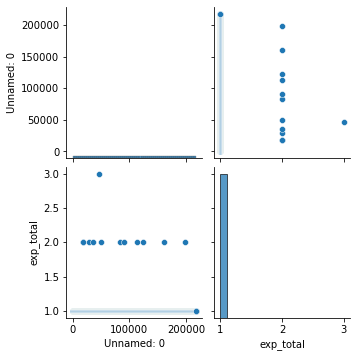

In [56]:
sns.pairplot(df);

Проблемы:
    1. время перевести в дататайм, Unnamed: 0 переименовать
    2. есть выбросы, но с ними далее

In [57]:
df = df.rename(columns={'Unnamed: 0': 'number'})

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217835 entries, 0 to 217834
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   number     217835 non-null  int64 
 1   time       217835 non-null  object
 2   ipcx       217835 non-null  object
 3   ipx        217835 non-null  object
 4   exp_total  217835 non-null  int64 
 5   provider   217835 non-null  object
dtypes: int64(2), object(4)
memory usage: 10.0+ MB


In [59]:
df['time'] = df['time'].astype('datetime64[ns]')

In [60]:
display(df)

,number,time,ipcx,ipx,exp_total,provider
0,0,2024-04-02 09:56:24,gi.no.tw.xxx,gi.no.tw.52,1,zetico
1,1,2024-04-13 20:27:47,mp.bm.be.xxx,mp.bm.be.211,1,moviqe
2,2,2024-04-14 09:06:37,br.am.ew.xxx,br.am.ew.157,1,gajeju
3,3,2024-04-16 21:40:46,cd.bm.ac.xxx,cd.bm.ac.206,1,jimune
4,4,2024-04-14 10:20:24,df.aj.nw.xxx,df.aj.nw.9,1,zetico
...,...,...,...,...,...,...
217830,217830,2024-04-01 18:20:40,jr.gr.rv.xxx,jr.gr.rv.27,1,dydopu
217831,217831,2024-04-07 16:09:49,uv.eg.sz.xxx,uv.eg.sz.108,1,libowu
217832,217832,2024-04-09 06:27:25,ci.jz.wy.xxx,ci.jz.wy.133,1,gajeju
217833,217833,2024-04-14 18:12:41,lo.jv.hn.xxx,lo.jv.hn.65,1,libowu


# Исследовательский анализ данных

In [61]:
df.describe()

,number,exp_total
count,217835.000000,217835.000000
mean,108917.000000,1.000060
std,62883.692282,0.008298
min,0.000000,1.000000
25%,54458.500000,1.000000
50%,108917.000000,1.000000
75%,163375.500000,1.000000
max,217834.000000,3.000000


Пока аномалий не видно, смотрим дальше


In [62]:
## Исследование просмотров рекламы

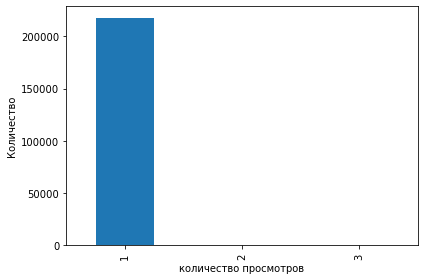

In [63]:
fig, ax = plt.subplots()
data = df['exp_total'].value_counts().sort_index()
data.plot(kind='bar', ax=ax)
ax.set_ylabel('Количество')
ax.set_xlabel('количество просмотров')
plt.tight_layout()
plt.show()

Больше всего просматривают рекламу 1 раз

In [64]:
data

1    217823
2        11
3         1
Name: exp_total, dtype: int64

In [65]:
df1=df[df['exp_total'] > 1]
df1.groupby(['provider'])['exp_total'].sum().sort_values(ascending=False).reset_index()

,provider,exp_total
0,kawife,7
1,libowu,6
2,cupocy,4
3,jydysa,2
4,moviqe,2
5,serimo,2
6,tiwyly,2


## Исследование временного ряда

In [66]:
# Выделим дату
df['date_only'] = df['time'].dt.floor('D')

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217835 entries, 0 to 217834
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   number     217835 non-null  int64         
 1   time       217835 non-null  datetime64[ns]
 2   ipcx       217835 non-null  object        
 3   ipx        217835 non-null  object        
 4   exp_total  217835 non-null  int64         
 5   provider   217835 non-null  object        
 6   date_only  217835 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(3)
memory usage: 11.6+ MB


In [68]:
df

,number,time,ipcx,ipx,exp_total,provider,date_only
0,0,2024-04-02 09:56:24,gi.no.tw.xxx,gi.no.tw.52,1,zetico,2024-04-02
1,1,2024-04-13 20:27:47,mp.bm.be.xxx,mp.bm.be.211,1,moviqe,2024-04-13
2,2,2024-04-14 09:06:37,br.am.ew.xxx,br.am.ew.157,1,gajeju,2024-04-14
3,3,2024-04-16 21:40:46,cd.bm.ac.xxx,cd.bm.ac.206,1,jimune,2024-04-16
4,4,2024-04-14 10:20:24,df.aj.nw.xxx,df.aj.nw.9,1,zetico,2024-04-14
...,...,...,...,...,...,...,...
217830,217830,2024-04-01 18:20:40,jr.gr.rv.xxx,jr.gr.rv.27,1,dydopu,2024-04-01
217831,217831,2024-04-07 16:09:49,uv.eg.sz.xxx,uv.eg.sz.108,1,libowu,2024-04-07
217832,217832,2024-04-09 06:27:25,ci.jz.wy.xxx,ci.jz.wy.133,1,gajeju,2024-04-09
217833,217833,2024-04-14 18:12:41,lo.jv.hn.xxx,lo.jv.hn.65,1,libowu,2024-04-14


In [69]:
group=df.groupby(['date_only'])['exp_total'].sum().reset_index()
group.describe()

,exp_total
count,15.000000
mean,14523.200000
std,2940.404642
min,5602.000000
25%,13255.500000
50%,14934.000000
75%,16285.000000
max,18238.000000


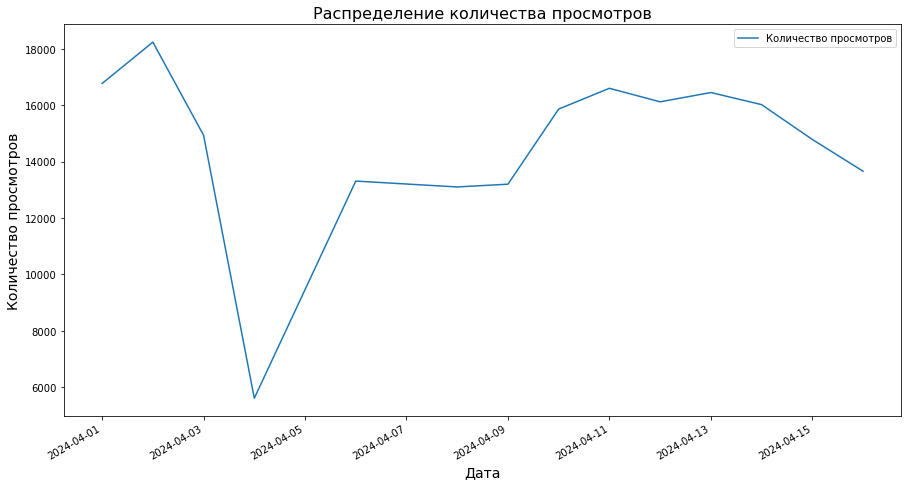

In [70]:
group.plot(x= 'date_only', y = 'exp_total', figsize=(15,8))
plt.legend(['Количество просмотров'])
plt.title('Распределение количества просмотров', fontsize=16)
plt.ylabel('Количество просмотров', fontsize=14)
plt.xlabel('Дата', fontsize=14);

Имеется просадка по количеству просмотров в период с 2024-04-03 по 2024-04-06 

In [71]:
df1 = df[df['date_only'] > '2024-04-02']
df1 = df1[df1['date_only'] < '2024-04-07']
df1


,number,time,ipcx,ipx,exp_total,provider,date_only
7,7,2024-04-03 17:46:02,fg.gr.bj.xxx,fg.gr.bj.232,1,miwequ,2024-04-03
13,13,2024-04-03 05:45:09,ci.nq.hm.xxx,ci.nq.hm.206,1,laxyba,2024-04-03
15,15,2024-04-06 18:17:12,xy.bc.vz.xxx,xy.bc.vz.161,1,quvyvi,2024-04-06
22,22,2024-04-03 20:17:09,br.gl.gz.xxx,br.gl.gz.37,1,pycugo,2024-04-03
26,26,2024-04-03 16:11:28,gv.lz.fh.xxx,gv.lz.fh.47,1,cupocy,2024-04-03
...,...,...,...,...,...,...,...
217756,217756,2024-04-06 13:02:28,uv.fv.rz.xxx,uv.fv.rz.232,1,wucivo,2024-04-06
217758,217758,2024-04-06 18:02:39,gi.el.hl.xxx,gi.el.hl.203,1,jydysa,2024-04-06
217768,217768,2024-04-06 17:39:27,pu.bz.fz.xxx,pu.bz.fz.189,1,miwequ,2024-04-06
217784,217784,2024-04-06 12:56:39,iw.sy.jr.xxx,iw.sy.jr.53,1,kyxamo,2024-04-06


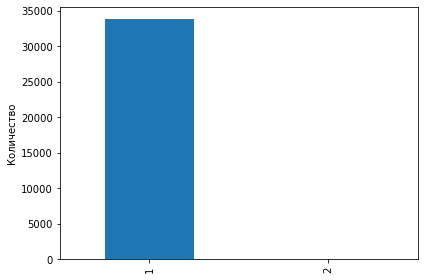

In [72]:
fig, ax = plt.subplots()
data = df1['exp_total'].value_counts().sort_index()
data.plot(kind='bar', ax=ax)
ax.set_ylabel('Количество')

plt.tight_layout()
plt.show()

In [73]:
data

1    33840
2        2
Name: exp_total, dtype: int64

In [74]:
group=df1.groupby(['date_only'])['exp_total'].sum().reset_index()
group.describe()

,exp_total
count,3.000000
mean,11281.333333
std,4985.186991
min,5602.000000
25%,9455.000000
50%,13308.000000
75%,14121.000000
max,14934.000000


Среднемедианное значение количества просмотров в период с 2024-04-03 по 2024-04-06 уменьшилось до 13308 по сравнению за весь период 14934. Что говорит о падении просмотров рекламы на 10%

In [75]:
group=df1.groupby(['ipcx'])['exp_total'].sum().sort_values(ascending=False).reset_index()
group.head()

,ipcx,exp_total
0,pu.bz.fz.xxx,377
1,fg.gr.oq.xxx,376
2,fg.gr.bj.xxx,360
3,pu.bz.cq.xxx,349
4,fg.gr.cr.xxx,343


In [76]:
group=df1.groupby(['ipcx'])['exp_total'].sum().sort_values(ascending=True).reset_index()
group[group['exp_total'] < 2]

,ipcx,exp_total
0,ac.tu.ct.xxx,1
1,hj.gn.de.xxx,1
2,hj.fu.rx.xxx,1
3,hj.fu.ox.xxx,1
4,hj.fu.mv.xxx,1
...,...,...
4641,df.dg.ay.xxx,1
4642,df.ck.as.xxx,1
4643,df.xy.gn.xxx,1
4644,df.dg.xz.xxx,1


In [77]:
group=df1.groupby(['ipx'])['exp_total'].sum().sort_values(ascending=False).reset_index()
group.head()

,ipx,exp_total
0,ix.pr.cm.58,7
1,jr.mu.fs.102,7
2,br.gl.gz.120,7
3,ci.nz.gt.235,7
4,br.gl.jn.156,6


In [78]:
group=df1.groupby(['ipx'])['exp_total'].sum().sort_values(ascending=True).reset_index()
group[group['exp_total'] < 2]

,ipx,exp_total
0,ac.tu.ct.85,1
1,hj.ix.iv.179,1
2,hj.ix.et.79,1
3,hj.ix.et.237,1
4,hj.ix.et.213,1
...,...,...
22637,df.aj.de.83,1
22638,df.aj.eh.19,1
22639,df.aj.de.86,1
22640,fk.px.ry.109,1


In [79]:
group=df1.groupby(['provider'])['exp_total'].sum().sort_values(ascending=False).reset_index()
group

,provider,exp_total
0,pycugo,4788
1,kawife,3645
2,zetico,3442
3,gajeju,2745
4,libowu,2549
...,...,...
830,mofycy,1
831,mobese,1
832,mipako,1
833,migudo,1


In [80]:
group=df1.groupby(['provider'])['exp_total'].sum().sort_values(ascending=True).reset_index()
group[group['exp_total'] < 2]

,provider,exp_total
0,babebe,1
1,pifycy,1
2,pibaze,1
3,pegufe,1
4,pecada,1
...,...,...
323,gywibo,1
324,bodety,1
325,bokiwy,1
326,jabexu,1


За указанный период:

    1. по параметру ipcx (подсеть) в топе pu.bz.fz.xxx (377), fg.gr.oq.xxx (376), fg.gr.bj.xxx (360)
    
    2. по параметру ipx в топе ix.pr.cm.58 (7), jr.mu.fs.102 (7), br.gl.gz.120 (7)
    
    3. по параметру provider в топе pycugo (4788), kawife (3645), zetico (3442)
    
за весь период по параметру provider в топе kawife	(7), libowu	(6), cupocy	(4)